In [1]:
import numpy as np
from icecream import ic

## 线性回归原理

In [2]:
X = np.random.normal(size=(10, 7))
X

array([[ 0.85605725, -0.44798511, -0.76299379,  0.56818311, -0.47529718,
         1.23651703,  1.02730642],
       [ 0.91817916,  0.72595334,  0.24693698,  0.59510611,  1.10119779,
         0.30501566, -0.66789755],
       [ 1.47051701,  2.19953562, -0.61449689,  0.88337407,  2.4031492 ,
        -1.59545853,  1.19508094],
       [ 1.21624915, -0.28091421, -0.1989651 , -1.41813837,  0.8091977 ,
        -0.70718678,  0.872639  ],
       [-0.87275914, -0.66056245, -0.27298604, -0.40192821, -0.02801716,
         0.19282271, -0.42284425],
       [ 0.27588889,  0.31238407, -1.48406561, -0.79524703, -1.00057132,
         0.27902525,  1.78229275],
       [-1.416006  , -0.12733088,  0.42220257, -0.66661885,  0.80263116,
         1.28371881, -0.84339572],
       [ 1.65981285, -0.04443592, -0.67680915,  0.78392584, -1.44028395,
        -1.45969047,  1.23967048],
       [ 0.24994738, -0.82951985, -0.70422736,  0.17934595,  0.90587694,
        -1.15948946, -0.15535141],
       [ 0.23284098,  0.3325

In [3]:
y = np.array([
    [1],
    [0],
    [0],
    [0],
    [1],
    [0],
    [0],
    [1],
    [0],
    [0],
])

In [4]:
weights = np.random.normal(size=(1, 7))
bias = 0

In [5]:
def loss(yhats, y):
    return np.mean( (yhats - y) ** 2)

def partial_w(yhats, y, train_x):
    return 2 * np.mean( (yhats - y) * train_x, axis=0)

def partial_b(yhats, y):
    return 2 * np.mean(yhats - y)

def train_linear_regression(X, weights, bias, y):
    lr = 1e-2
    for i in range(30):
        yhats = X @ weights.T + bias
        weights += -1 * partial_w(yhats, y, X) * lr
        loss_value = loss(yhats, y)
        ic(loss_value)
        bias += -1*partial_b(yhats, y)

In [11]:
train_linear_regression(X, weights, bias, y)

ic| loss_value: 0.2151924305495596
ic| loss_value: 0.21704458766879356
ic| loss_value: 0.2189764482152316
ic| loss_value: 0.22098937395453197
ic| loss_value: 0.2230847840414587
ic| loss_value: 0.2252641559540053
ic| loss_value: 0.22752902647140436
ic| loss_value: 0.22988099269651383
ic| loss_value: 0.23232171312311217
ic| loss_value: 0.23485290874868253
ic| loss_value: 0.2374763642333036
ic| loss_value: 0.24019392910530962
ic| loss_value: 0.2430075190144263
ic| loss_value: 0.24591911703312408
ic| loss_value: 0.24893077500698188
ic| loss_value: 0.2520446149548873
ic| loss_value: 0.25526283051994664
ic| loss_value: 0.2585876884720192
ic| loss_value: 0.2620215302628278
ic| loss_value: 0.2655667736346492
ic| loss_value: 0.26922591428362125
ic| loss_value: 0.27300152757875207
ic| loss_value: 0.2768962703377591
ic| loss_value: 0.2809128826609092
ic| loss_value: 0.2850541898240761
ic| loss_value: 0.28932310423227636
ic| loss_value: 0.29372262743499017
ic| loss_value: 0.2982558522046208
ic| lo

## 逻辑斯蒂回归原理

In [9]:
X = np.random.normal(size=(10, 7))
X

array([[-0.18960463,  2.15120633,  0.92454788, -0.70237309, -1.56149436,
        -0.14570325,  1.14843757],
       [ 0.62362127, -0.05897596,  0.72704506, -0.82984973, -0.04199696,
         0.67540386, -0.10570224],
       [-0.61222791, -0.13169362,  1.47728942, -1.23001103, -0.08756364,
         1.17425333, -0.88405139],
       [ 0.56369411,  0.44036454, -0.29440275,  0.25148916,  0.83182337,
        -1.11153496,  1.51470046],
       [-0.38018386,  1.95941992, -0.14718331, -0.23422799, -0.3735152 ,
        -2.05980188, -0.11734093],
       [ 1.47351478,  1.85526257, -1.05468454, -0.19093845, -0.24848054,
         0.86245277, -0.99242146],
       [-0.66376812, -0.0768356 , -1.14601214,  0.17178516,  0.57340709,
         0.52489463, -1.38286705],
       [ 0.96315332,  1.18317482,  0.8824854 ,  0.33629302, -0.02248127,
         1.16873128, -1.39587034],
       [ 0.43097565,  1.12155886, -1.03006785,  1.72195451,  0.8002685 ,
        -2.79522544, -0.61794303],
       [-0.4213849 ,  0.3861

In [10]:
y = np.array([
    [1],
    [0],
    [0],
    [0],
    [1],
    [0],
    [0],
    [1],
    [0],
    [0],
])

In [11]:
weights = np.random.normal(size=(1, 7))
bias = 0

In [12]:
def partial_w(yhats, y, train_x):
    return 2 * np.mean( (yhats - y) * train_x, axis=0)

def partial_b(yhats, y):
    return 2 * np.mean(yhats - y)

def logistic(x):
    return 1 / (1 + np.exp(-x))

# def derivatives(x):
#     return logistic(x) * (1 - logistic(x))

def logistic_loss(yhats, y):
    return np.mean(y * np.log(yhats) + (1 - y) * np.log(yhats))
    
def train_logistic_regression(X, weights, bias, y):
    for i in range(20):
        yh = X @ weights.T + bias
        yhats = logistic(yh)
        threshold = 0.5
        probs = np.array((yhats > threshold), dtype=np.int)
        #ic(probs)
        loss = logistic_loss(yhats, y)
        ic(loss)
        learning_rate = 1e-4
        weights += partial_w(yh, y, X) * learning_rate
        bias += partial_b(yhats, y)
        #ic(yhats)

In [13]:
train_logistic_regression(X, weights, bias, y)

/var/folders/19/dgxwsbgd76728hx577833nx00000gn/T/ipykernel_2505/1053828243.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  probs = np.array((yhats > threshold), dtype=np.int)
ic| loss: -1.282500999824686
ic| loss: -1.158315667341081
ic| loss: -1.0066605060994358
ic| loss: -0.8266076148974569
ic| loss: -0.6228378101358294
ic| loss: -0.4110294281484691
ic| loss: -0.2221188660939999
ic| loss: -0.09189627638259104
ic| loss: -0.02914430376957896
ic| loss: -0.007837813415626713
ic| loss: -0.0019782268681848934
ic| loss: -0.0004901723137304115
ic| 

## softmax多分类原理

In [33]:
X = np.random.normal(size=(10, 7))
X

array([[ 0.75851397,  1.18263584,  1.10194432, -0.49530614,  0.12118499,
        -0.09903793, -0.45699385],
       [-0.34510285,  1.28391797,  1.73206782,  1.25676382, -0.30132211,
        -0.35629175, -0.4078143 ],
       [ 0.0645615 ,  0.48399306, -2.6151535 , -1.45441648, -0.32754491,
         0.34301158, -2.11707437],
       [-0.38621005, -1.24932494,  0.77980923,  1.48737375,  0.15697739,
        -0.19937169, -0.35541406],
       [ 0.05489944, -1.9208908 ,  0.12819344, -0.45235292, -1.15782994,
         0.64337273, -0.14886445],
       [-1.26273508, -0.44073752,  0.16507198, -0.03336603,  1.06567002,
        -1.29729771,  0.05577501],
       [ 1.84739153, -1.01513499,  0.29877883,  0.11179003, -1.38712794,
        -0.9122367 ,  0.21602   ],
       [-1.03282633,  0.18363501,  1.06670473, -0.98305025,  0.46687787,
        -0.42338033,  2.24065067],
       [-0.86112607, -1.91433939, -0.09937837, -1.05895669, -0.19598358,
         0.77526776,  0.37649278],
       [ 0.04046872, -0.2231

In [34]:
y = np.array([
    [0,0,0,0,1],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,0,1,0],
    [0,0,1,0,0],
    [0,1,0,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0]
])

In [35]:
weights = np.random.normal(size=(5,7))
bias = 0
weights

array([[-0.8376805 , -0.93117994,  1.68161697,  0.4127514 ,  0.74117597,
        -0.37039335, -0.30033729],
       [-0.62133335, -1.64380405, -0.1150983 , -0.9399792 ,  0.06726693,
         1.62178776,  0.19628432],
       [-0.31876083,  1.13912391, -0.32543633, -1.04421023, -0.07856252,
        -0.60897906,  0.27121422],
       [ 0.08349229, -0.40346071,  0.20948992, -0.7721388 ,  0.56693149,
         0.00720306, -0.78337012],
       [ 0.37420206,  0.35593932, -1.91240523, -1.28101639,  0.74163924,
        -0.17064796,  3.12818957]])

In [36]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))


In [41]:
def softmax(x):
    x -= np.max(x, axis=1).reshape(x.shape[0], 1)
    x_sum = np.sum(np.exp(x), axis=1)
    return np.exp(x) / x_sum.reshape(x.shape[0], 1)

def cross_entropy(yhats, y):
    return -np.mean( y * np.log(yhats) )

def train_softmax(X, weights, bias, y):
    for i in range(1):
        yh = X @ weights.T + bias
        yhats = softmax(yh)
        ic(yhats)
        threshold = 0.5
        probs = np.array((yhats > threshold), dtype=np.int)
        ic(probs)
        loss = cross_entropy(yhats, y)
        ic(loss)

In [42]:
train_softmax(X, weights, bias, y)

ic| yhats: array([[1.81365278e-01, 1.49700875e-02, 5.00501717e-01, 2.84361812e-01,
                   1.88011052e-02],
                  [9.13039469e-01, 1.35772052e-03, 5.95796588e-02, 2.58531859e-02,
                   1.69966266e-04],
                  [2.84449229e-04, 1.38472778e-01, 4.56113812e-01, 3.43798434e-01,
                   6.13305266e-02],
                  [9.43540749e-01, 3.52968152e-02, 1.04741950e-03, 1.99508130e-02,
                   1.64203821e-04],
                  [2.24288395e-02, 9.54073140e-01, 1.31562613e-03, 2.03094664e-02,
                   1.87292814e-03],
                  [7.75119282e-01, 2.37489495e-02, 7.15522041e-02, 7.75776209e-02,
                   5.20019438e-02],
                  [1.96443104e-01, 1.39792006e-01, 1.28129221e-01, 2.89174813e-01,
                   2.46460857e-01],
                  [1.17408284e-02, 4.37834202e-03, 1.34311144e-02, 8.86498979e-04,
                   9.69563216e-01],
                  [9.27705255e-03, 9.72633370e-0

## one-hot原理

In [8]:
from icecream import ic

def onehot(elements):
    es = list(set(elements))
    
    res = []
    for e in es:
        zeros = [0] * len(es)
        zeros[es.index(e)] = 1
        res.append(zeros)
    
    return res

In [9]:
ic(onehot(['北京', '上海','广州','北京','广州','上海']))

ic| onehot(['北京', '上海','广州','北京','广州','上海']): [[1, 0, 0], [0, 1, 0], [0, 0, 1]]


[[1, 0, 0], [0, 1, 0], [0, 0, 1]]

In [7]:
!python -V

Python 3.9.7


In [11]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
enc = OneHotEncoder(handle_unknown='ignore')

In [13]:
help(OneHotEncoder)

Help on class OneHotEncoder in module sklearn.preprocessing._encoders:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse``
 |  parameter)
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data to many scikit-learn
 |  estimators, notably linear models and SVMs with the standard ker

In [25]:
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
enc.categories_
enc.get_feature_names()

/Users/fenghaoguo/opt/anaconda3/envs/p39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Female', 'x0_Male', 'x1_1', 'x1_2', 'x1_3'], dtype=object)

In [20]:
enc.transform([['Female', 1], ['Male', 4]]).toarray()

array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])

array([['Male', 1],
       [None, 2]], dtype=object)

In [18]:
enc.get_feature_names_out(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)

## MNIST

In [28]:
from torchvision.datasets import MNIST

In [29]:
train = MNIST('dataset', train=True, download=True)
test = MNIST('dataset', train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [31]:
zero_and_six = [t for i, t in enumerate(train) if train.targets[i] in [0, 6]]
zero_and_six_test = [t for i, t in enumerate(train) if train.targets[i] in [0, 6]]

In [45]:
from icecream import ic

In [46]:
train.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [47]:
import numpy as np
zero_and_six_train_x = np.array([
    np.array(t).reshape(-1, ) for t, label in zero_and_six
])
zero_and_six_train_y = np.array([
    label for t, label in zero_and_six
])

In [48]:
zero_and_six_test_x = np.array([
    np.array(t).reshape(-1, ) for t, label in zero_and_six_test
])
zero_and_six_test_y = np.array([
    label for t, label in zero_and_six_test
])

In [49]:
zero_and_six_train_x[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [50]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(zero_and_six_train_x, zero_and_six_train_y)

LogisticRegression(max_iter=1000)

ic| lr_model.predict([zero_and_six_test_x[index]]): array([6])


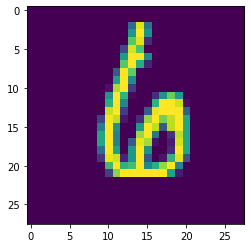

ic| lr_model.predict([zero_and_six_test_x[index]]): array([6])


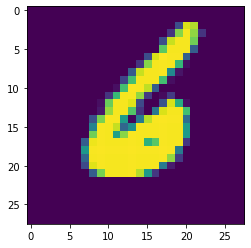

ic| lr_model.predict([zero_and_six_test_x[index]]): array([6])


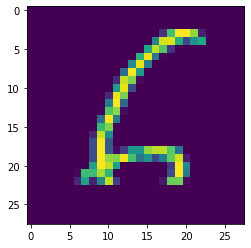

ic| lr_model.predict([zero_and_six_test_x[index]]): array([0])


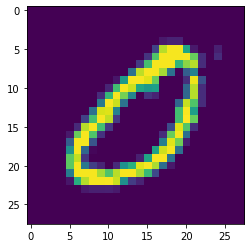

ic| lr_model.predict([zero_and_six_test_x[index]]): array([0])


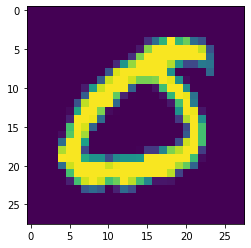

In [52]:
import matplotlib.pyplot as plt

for i in range(5):
    index = np.random.choice(range(len(zero_and_six_test_x)))
    ic(lr_model.predict([zero_and_six_test_x[index]]))
    plt.imshow(zero_and_six_test_x[index].reshape(28, 28))
    plt.show()

In [53]:
ic(lr_model.score(zero_and_six_train_x, zero_and_six_train_y))
ic(lr_model.score(zero_and_six_test_x, zero_and_six_test_y))
ic(lr_model.coef_)
ic(lr_model.intercept_)

ic| lr_model.score(zero_and_six_train_x, zero_and_six_train_y): 1.0
ic| lr_model.score(zero_and_six_test_x, zero_and_six_test_y): 1.0
ic| lr_model.coef_: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                            -6.00221275e-10, -1.31427762e-09,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00, -2.53561958e-1

                             6.17328497e-11,  0.00000000e+00,  0.00000000e+00,
                             0.00000000e+00,  4.53387335e-09,  6.83119235e-08,
                            -2.19041509e-03, -3.54190534e-02,  4.82016755e-03,
                            -7.70986270e-03,  3.83900164e-03, -1.73084332e-02,
                             4.40137819e-02, -5.12079338e-02,  1.85066262e-02,
                             6.17435269e-03, -3.17191496e-03, -1.42681515e-02,
                            -1.10791444e-03, -1.41089844e-02,  1.26030220e-03,
                            -1.84509446e-02,  1.62780864e-02, -1.78091433e-02,
                            -1.34179702e-02, -5.08732979e-04,  2.83234118e-08,
                             1.10087926e-08,  1.13968338e-10,  0.00000000e+00,
                             0.00000000e+00,  0.00000000e+00,  9.29690003e-11,
                             9.10841250e-09,  3.51330437e-07, -2.90437791e-03,
                             1.36708067e-02, -4.6604

array([0.005238])

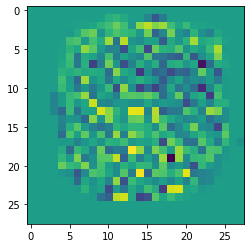

In [54]:
plt.imshow(lr_model.coef_.reshape(28, 28))
plt.show()

In [55]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   